In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))


In [ ]:
# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_train, X_train, epochs=50, validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0805 - val_loss: 0.0659
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0653 - val_loss: 0.0640
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - val_loss: 0.0630
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - val_loss: 0.0625
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0625 - val_loss: 0.0620
Epoch 6/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0621 - val_loss: 0.0616
Epoch 7/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0619 - val_loss: 0.0615
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0616 - val_loss: 0.0612
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0615 - val_loss: 0.0612
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.06

313/313 [==============================] - 1s 2ms/step


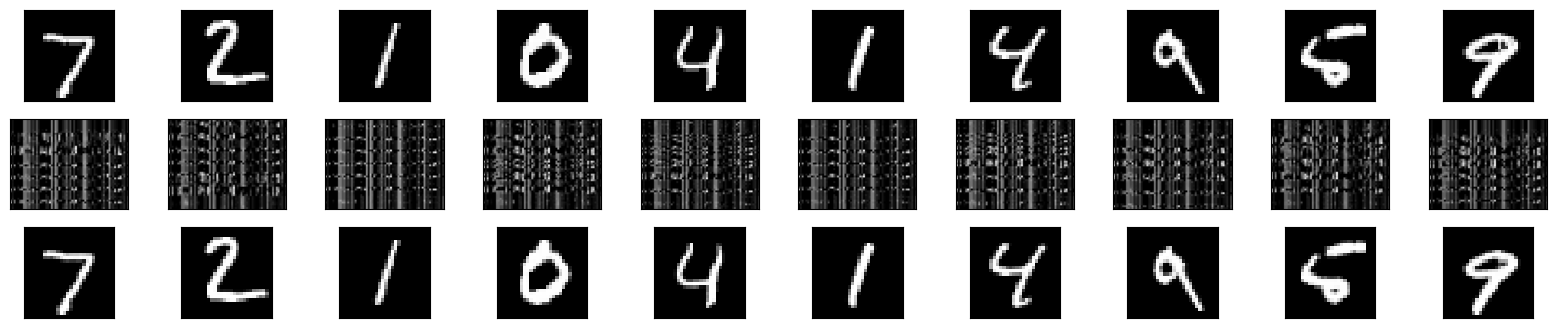

In [ ]:
from matplotlib import pyplot as plt

encoder = Model(input_img, encoded)

decoded_imgs = autoencoder.predict(X_test)
encoded_imgs = encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape((7*7, 64)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decoded
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
